In [6]:
import pandas as pd
import numpy as np
import torch
from torch import nn
import matplotlib.pyplot as plt

In [233]:
train_data = torch.tensor([
    [[0,0,0,0],
     [0,1,0,0],
     [0,0,0,0],
     [0,0,0,0]],
    
    [[0,0,0,0],
     [0,0,1,0],
     [0,0,0,0],
     [0,0,0,0]],
    
    [[0,0,0,0],
     [0,0,0,0],
     [0,1,0,0],
     [0,0,0,0]],
    
    [[0,0,0,0],
     [0,0,0,0],
     [0,0,1,0],
     [0,0,0,0]],

    [[0,0,0,0],
     [0,1,1,0],
     [0,0,0,0],
     [0,0,0,0]],
    
    [[0,0,0,0],
     [0,1,0,0],
     [0,0,1,0],
     [0,0,0,0]],
    
    [[0,0,0,0],
     [0,1,0,0],
     [0,1,0,0],
     [0,0,0,0]],
    
    [[0,0,0,0],
     [0,0,1,0],
     [0,0,1,0],
     [0,0,0,0]],
    
    [[0,0,0,0],
     [0,0,0,0],
     [0,1,1,0],
     [0,0,0,0]],
    
    [[0,0,0,0],
     [0,0,1,0],
     [0,1,0,0],
     [0,0,0,0]],
    
    [[0,0,0,0],
     [0,1,1,0],
     [0,0,1,0],
     [0,0,0,0]],
    
    [[0,0,0,0],
     [0,0,1,0],
     [0,1,1,0],
     [0,0,0,0]],
    
    [[0,0,0,0],
     [0,1,0,0],
     [0,1,1,0],
     [0,0,0,0]],
    
    [[0,0,0,0],
     [0,1,1,0],
     [0,1,0,0],
     [0,0,0,0]],
    
    [[0,0,0,0],
     [0,1,1,0],
     [0,1,1,0],
     [0,0,0,0]],
], dtype=torch.float) # in_features = 2 

# train_labels = torch.tensor([[1],[1],[1],[1],[2],[2],[2],[2],[2],[2],[3],[3],[3],[3],[4]], dtype=torch.float) # out_features = 1
train_labels = torch.tensor([[1],[2],[3],[4],[3],[5],[4],[6],[7],[5],[7],[9],[8],[6],[10]], dtype=torch.float) # out_features = 1

In [89]:
train_data.shape, train_labels.shape

(torch.Size([15, 4, 4]), torch.Size([15, 1]))

<Figure size 100x100 with 0 Axes>

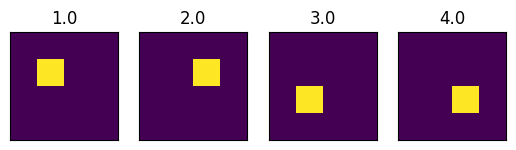

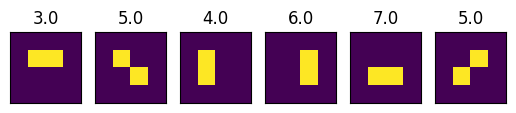

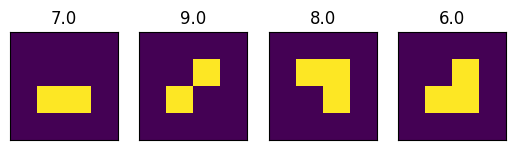

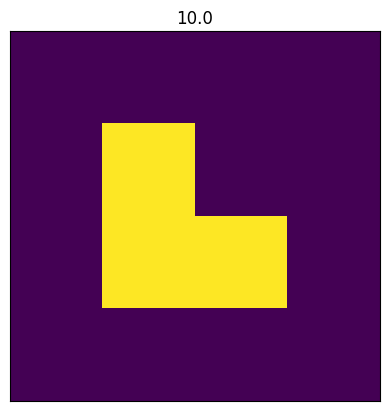

In [234]:
plt.figure(figsize=(1,1))
arr = [4,6,4,1]

for i in range(4):
    fig, axes = plt.subplots(1,arr[i])
    q = 0
    for p in range(i):
        q += arr[p] 
    # print(q)
    for j in range(arr[i]):
        if arr[i] != 1:
            axes[j].imshow(train_data[i*4+j])
            axes[j].set_xticks([])
            axes[j].set_yticks([])
            axes[j].set_title(str(train_labels[q + j][0].numpy()))
        else:
            axes.imshow(train_data[i*4+j])
            axes.set_xticks([])
            axes.set_yticks([])
            axes.set_title(str(train_labels[q+j][0].numpy()))
        # plt.show()

In [296]:
class Model(nn.Module):
    def __init__(self,in_f,out_f):
        super(Model,self).__init__()

        self.conv1 = nn.Conv2d(in_channels=in_f, out_channels=1, kernel_size=1, stride=1)
        self.conv2 = nn.Conv2d(in_channels=1, out_channels=out_f, kernel_size=1, stride=1)
        self.relu = nn.ReLU()
        self.avgpool = nn.AvgPool2d(4)
        self.flat = nn.Linear(1, out_f)

    def forward(self,x):
        # print("Model: ")
        # print("Shape of x: ",x.shape)
        x = self.conv1(x)
        # print("Shape of x after conv1: ", x.shape)
        # x = self.conv2(x)
        # print("Shape of x after conv2: ", x.shape)
        x = self.relu(x)
        x = self.avgpool(x)
        # print("Shape of x after avgpool: ", x.shape)
        x = self.flat(x)
        # print("Shape of x after flatten: ", x.shape)
        return x

In [297]:
model = Model(1,1) # image_channel

In [189]:
p = list(model.parameters())
p[0].shape, p[1].shape, p

(torch.Size([10, 1, 2, 2]),
 torch.Size([10]),
 [Parameter containing:
  tensor([[[[-0.2124, -0.1501],
            [-0.0593, -0.1937]]],
  
  
          [[[ 0.1570,  0.3442],
            [-0.0047,  0.1699]]],
  
  
          [[[ 0.2220, -0.3709],
            [ 0.4259,  0.4219]]],
  
  
          [[[-0.0992, -0.3544],
            [-0.1091,  0.4484]]],
  
  
          [[[-0.4926, -0.4166],
            [ 0.0860, -0.2186]]],
  
  
          [[[ 0.0404,  0.2210],
            [ 0.0685,  0.4564]]],
  
  
          [[[ 0.3997,  0.1919],
            [ 0.1311,  0.3842]]],
  
  
          [[[-0.0235,  0.2097],
            [ 0.1146, -0.2753]]],
  
  
          [[[-0.3750,  0.1300],
            [-0.3753,  0.0023]]],
  
  
          [[[-0.0282, -0.3775],
            [-0.0778, -0.1290]]]], requires_grad=True),
  Parameter containing:
  tensor([ 0.0237,  0.4401,  0.2731, -0.3019,  0.4036,  0.3611, -0.4856, -0.4494,
          -0.4577,  0.3420], requires_grad=True),
  Parameter containing:
  tensor([[[[

In [190]:
from torchsummary import summary
summary(model, input_size=(1,4,4)) # channels, width, height

Model: 
Shape of x:  torch.Size([2, 1, 4, 4])
Shape of x after conv1:  torch.Size([2, 10, 3, 3])
Shape of x after conv2:  torch.Size([2, 1, 2, 2])
Shape of x after avgpool:  torch.Size([2, 1, 1, 1])
Shape of x after flatten:  torch.Size([2, 1, 1, 1])
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1             [-1, 10, 3, 3]              50
            Conv2d-2              [-1, 1, 2, 2]              41
         AvgPool2d-3              [-1, 1, 1, 1]               0
            Linear-4              [-1, 1, 1, 1]               2
Total params: 93
Trainable params: 93
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


In [298]:
loss_fn = nn.L1Loss()
# optimizer = torch.optim.SGD(params=model.parameters(), lr=0.01)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
# loss_fn = nn.CrossEntropyLoss()

In [192]:

y_pred = model(train_data.unsqueeze(dim=1))
# y_pred.squeeze(dim=0), train_labels[1], loss_fn(y_pred.squeeze(dim=0), train_labels[0])
y_pred.squeeze(dim=1).squeeze(dim=1).shape

Model: 
Shape of x:  torch.Size([15, 1, 4, 4])
Shape of x after conv1:  torch.Size([15, 10, 3, 3])
Shape of x after conv2:  torch.Size([15, 1, 2, 2])
Shape of x after avgpool:  torch.Size([15, 1, 1, 1])
Shape of x after flatten:  torch.Size([15, 1, 1, 1])


torch.Size([15, 1])

# Gradient descent
Since I am calculating grad on every data each iteration

In [299]:
epochs = 1000

for i in range(epochs):
    model.train()
    y_pred = model(train_data.unsqueeze(dim=1))
    loss = loss_fn(y_pred.squeeze(dim=1).squeeze(dim=1), train_labels)
    print(loss)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    model.eval()

tensor(5.4058, grad_fn=<MeanBackward0>)
tensor(5.3841, grad_fn=<MeanBackward0>)
tensor(5.3622, grad_fn=<MeanBackward0>)
tensor(5.3400, grad_fn=<MeanBackward0>)
tensor(5.3177, grad_fn=<MeanBackward0>)
tensor(5.2950, grad_fn=<MeanBackward0>)
tensor(5.2722, grad_fn=<MeanBackward0>)
tensor(5.2490, grad_fn=<MeanBackward0>)
tensor(5.2257, grad_fn=<MeanBackward0>)
tensor(5.2020, grad_fn=<MeanBackward0>)
tensor(5.1781, grad_fn=<MeanBackward0>)
tensor(5.1539, grad_fn=<MeanBackward0>)
tensor(5.1294, grad_fn=<MeanBackward0>)
tensor(5.1047, grad_fn=<MeanBackward0>)
tensor(5.0797, grad_fn=<MeanBackward0>)
tensor(5.0544, grad_fn=<MeanBackward0>)
tensor(5.0287, grad_fn=<MeanBackward0>)
tensor(5.0028, grad_fn=<MeanBackward0>)
tensor(4.9766, grad_fn=<MeanBackward0>)
tensor(4.9500, grad_fn=<MeanBackward0>)
tensor(4.9232, grad_fn=<MeanBackward0>)
tensor(4.8960, grad_fn=<MeanBackward0>)
tensor(4.8685, grad_fn=<MeanBackward0>)
tensor(4.8407, grad_fn=<MeanBackward0>)
tensor(4.8125, grad_fn=<MeanBackward0>)


In [283]:
with torch.no_grad():
    y_pred = model(train_data.unsqueeze(dim=1))
train_labels, y_pred.squeeze(dim=1).squeeze(dim=1)

(tensor([[ 1.],
         [ 2.],
         [ 3.],
         [ 4.],
         [ 3.],
         [ 5.],
         [ 4.],
         [ 6.],
         [ 7.],
         [ 5.],
         [ 7.],
         [ 9.],
         [ 8.],
         [ 6.],
         [10.]]),
 tensor([[ 1.0021],
         [ 2.0037],
         [ 3.0049],
         [ 4.0070],
         [ 3.0044],
         [ 5.0076],
         [ 4.0056],
         [ 6.0092],
         [ 7.0105],
         [ 5.0072],
         [ 7.0099],
         [ 9.0127],
         [ 8.0111],
         [ 6.0079],
         [10.0134]]))

# SGD 
one data at one iteration

In [214]:
epochs = 100

for i in range(epochs):
    for j in range(15):
        model.train()
        y_pred = model(train_data[j].unsqueeze(dim=0))
        loss = loss_fn(y_pred.squeeze(dim=1), train_labels)
    
        optimizer.zero_grad()
    
        loss.backward()
    
        optimizer.step()

    model.eval()

Model: 
Shape of x:  torch.Size([1, 4, 4])
Shape of x after conv1:  torch.Size([10, 3, 3])
Shape of x after conv2:  torch.Size([1, 2, 2])
Shape of x after avgpool:  torch.Size([1, 1, 1])
Shape of x after flatten:  torch.Size([1, 1, 1])
Model: 
Shape of x:  torch.Size([1, 4, 4])
Shape of x after conv1:  torch.Size([10, 3, 3])
Shape of x after conv2:  torch.Size([1, 2, 2])
Shape of x after avgpool:  torch.Size([1, 1, 1])
Shape of x after flatten:  torch.Size([1, 1, 1])
Model: 
Shape of x:  torch.Size([1, 4, 4])
Shape of x after conv1:  torch.Size([10, 3, 3])
Shape of x after conv2:  torch.Size([1, 2, 2])
Shape of x after avgpool:  torch.Size([1, 1, 1])
Shape of x after flatten:  torch.Size([1, 1, 1])
Model: 
Shape of x:  torch.Size([1, 4, 4])
Shape of x after conv1:  torch.Size([10, 3, 3])
Shape of x after conv2:  torch.Size([1, 2, 2])
Shape of x after avgpool:  torch.Size([1, 1, 1])
Shape of x after flatten:  torch.Size([1, 1, 1])
Model: 
Shape of x:  torch.Size([1, 4, 4])
Shape of x af

In [215]:
with torch.no_grad():
    y_pred = model(train_data.unsqueeze(dim=1))
train_labels, y_pred.squeeze(dim=1).squeeze(dim=1)

Model: 
Shape of x:  torch.Size([15, 1, 4, 4])
Shape of x after conv1:  torch.Size([15, 10, 3, 3])
Shape of x after conv2:  torch.Size([15, 1, 2, 2])
Shape of x after avgpool:  torch.Size([15, 1, 1, 1])
Shape of x after flatten:  torch.Size([15, 1, 1, 1])


(tensor([[1.],
         [1.],
         [1.],
         [1.],
         [2.],
         [2.],
         [2.],
         [2.],
         [2.],
         [2.],
         [3.],
         [3.],
         [3.],
         [3.],
         [4.]]),
 tensor([[2.0341],
         [2.0272],
         [2.0264],
         [2.0247],
         [2.0259],
         [2.0235],
         [2.0251],
         [2.0165],
         [2.0158],
         [2.0182],
         [2.0152],
         [2.0075],
         [2.0145],
         [2.0169],
         [2.0062]]))

# batch gradient descent

In [231]:
epochs = 100
batch_size = 4

for i in range(epochs):
    # for j in range(15):
    data_temp = []
    label_temp = []
    for j in range(batch_size):
        if j+(i%4)*batch_size >= 15 :
            break
        data_temp.append(train_data[j+(i%4)*batch_size])
        label_temp.append(train_labels[j+(i%4)*batch_size])
    data_temp = torch.from_numpy(np.array(data_temp)).float()
    label_temp = torch.from_numpy(np.array(label_temp)).float()
    model.train()
    y_pred = model(data_temp.unsqueeze(dim=1))
    loss = loss_fn(y_pred.squeeze(dim=1).squeeze(dim=1), label_temp)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    model.eval()

Model: 
Shape of x:  torch.Size([4, 1, 4, 4])
Shape of x after conv1:  torch.Size([4, 10, 3, 3])
Shape of x after conv2:  torch.Size([4, 1, 2, 2])
Shape of x after avgpool:  torch.Size([4, 1, 1, 1])
Shape of x after flatten:  torch.Size([4, 1, 1, 1])
Model: 
Shape of x:  torch.Size([4, 1, 4, 4])
Shape of x after conv1:  torch.Size([4, 10, 3, 3])
Shape of x after conv2:  torch.Size([4, 1, 2, 2])
Shape of x after avgpool:  torch.Size([4, 1, 1, 1])
Shape of x after flatten:  torch.Size([4, 1, 1, 1])
Model: 
Shape of x:  torch.Size([4, 1, 4, 4])
Shape of x after conv1:  torch.Size([4, 10, 3, 3])
Shape of x after conv2:  torch.Size([4, 1, 2, 2])
Shape of x after avgpool:  torch.Size([4, 1, 1, 1])
Shape of x after flatten:  torch.Size([4, 1, 1, 1])
Model: 
Shape of x:  torch.Size([3, 1, 4, 4])
Shape of x after conv1:  torch.Size([3, 10, 3, 3])
Shape of x after conv2:  torch.Size([3, 1, 2, 2])
Shape of x after avgpool:  torch.Size([3, 1, 1, 1])
Shape of x after flatten:  torch.Size([3, 1, 1, 

In [232]:
with torch.no_grad():
    y_pred = model(train_data.unsqueeze(dim=1))
train_labels, y_pred.squeeze(dim=1).squeeze(dim=1)

Model: 
Shape of x:  torch.Size([15, 1, 4, 4])
Shape of x after conv1:  torch.Size([15, 10, 3, 3])
Shape of x after conv2:  torch.Size([15, 1, 2, 2])
Shape of x after avgpool:  torch.Size([15, 1, 1, 1])
Shape of x after flatten:  torch.Size([15, 1, 1, 1])


(tensor([[1.],
         [1.],
         [1.],
         [1.],
         [2.],
         [2.],
         [2.],
         [2.],
         [2.],
         [2.],
         [3.],
         [3.],
         [3.],
         [3.],
         [4.]]),
 tensor([[0.9796],
         [0.9830],
         [0.9848],
         [0.9713],
         [2.0204],
         [2.0086],
         [2.0222],
         [2.0121],
         [2.0139],
         [2.0256],
         [3.0494],
         [3.0547],
         [3.0512],
         [3.0630],
         [4.0920]]))